# PyMC を用いた単純なガウス分布の平均パラメータの推定

In [1]:
from __future__ import (
    print_function,
    division,
    absolute_import,
    unicode_literals)

## 準備作業

パッケージの import と %matplotlibのインライン指定

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from pymc import Normal, deterministic, MCMC, Matplot
%matplotlib inline

## 平均パラメータ \\(\\mu\\) の事前分布

\\(x\\) を生成する正規分布の平均は \\(\\mu\\)．この \\(\\mu\\) の事前分布は，平均が 0 で，分散が \\(1/0.01\\)．
分布のヒストグラムを表示して，分布の概要を把握．

(array([  3.,  10.,  13.,  14.,  17.,  19.,  12.,   5.,   4.,   3.]),
 array([-0.22322053, -0.17617796, -0.12913538, -0.08209281, -0.03505024,
         0.01199234,  0.05903491,  0.10607748,  0.15312005,  0.20016263,
         0.2472052 ]),
 <a list of 10 Patch objects>)

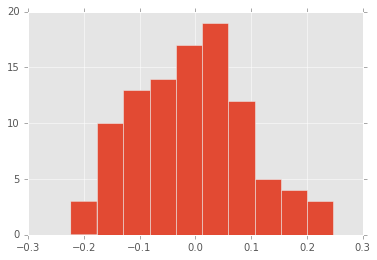

In [3]:
mu = np.random.normal(0.0, 0.1, 100)
plt.hist(mu)

### 訓練用サンプルデータの生成

`x_sample` は学習用のサンプル．
平均が 1.0 で，標準偏差が 1.0 の正規分布に従う．
まずは少数のサンプル 5 個だけで実行してみる．

\\(\\mu\\) が 1.0 を中心に分布するようになれば成功．

In [4]:
x_sample = np.random.normal(loc=1.0, scale=1.0, size=5)

## パラメータの事後確率の推定

### モデルの構築

生成モデルは，非常に単純：
\\[
\\mu\\sim\\mathrm{Normal}(0, 0.1^2)
\\]
\\[
x\\sim\\mathrm{Normal}(\\mu, 1.0^2)
\\]

※ NumPy の np.random.normal は平均と標準偏差で指定するが，PyMC の正規分布は，標準偏差ではなく精度（分散の逆数・逆行列）で指定する．

\\(x\\) は，平均が \\(\\mu\\) で，分散が \\(1/0.01\\) としておく．この \\(x\\) については標本が観測される（グラフィカルモデルでいえば黒丸）ので，  `value=x_sample` と `observed=True` を指定しておく．

In [5]:
mu = Normal('mu', 0, 1 / (0.1 ** 2))
x = Normal('x', mu=mu, tau=1/(1.0**2), value=x_sample, observed=True)

### MCMCによる事後確率の推定

マルコフ連鎖のモデルを指定． `input` で関連する変数を指定し，適当な回数だけ反復する．

In [6]:
M = MCMC(input=[mu, x])
M.sample(iter=10000)

 [-----------------100%-----------------] 10000 of 10000 complete in 0.6 sec

左上は \\(\\mu\\) のサンプル値の反復中の変化，左下は自己相関で収束してるかどうかを確認できる．右が \\(\\mu\\) のデータを観測したあとのパラメータの事後分布

Plotting mu


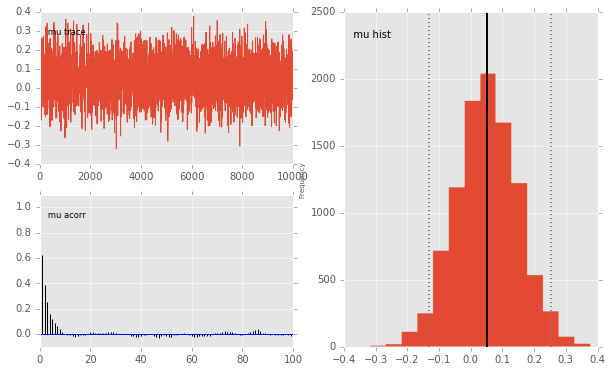

In [7]:
Matplot.plot(mu)

## サンプル数を増やしたら

今度は同じモデルで，サンプル数を1000個まで増やしてみる．

In [8]:
x_sample = np.random.normal(loc=1.0, scale=1.0, size=1000)
mu = Normal('mu', 0, 1 / (0.1 ** 2))
x = Normal('x', mu=mu, tau=1/(1.0**2), value=x_sample, observed=True)

In [9]:
M = MCMC(input=[mu, x])
M.sample(iter=10000)

 [-----------------100%-----------------] 10000 of 10000 complete in 0.7 sec

すると \\(\\mu\\) の事後分布がずっと1.0の周囲で尖った分布になってる．すなわち，事前分布の影響が減ってデータに合わせた分布になってることが分かる．

Plotting mu


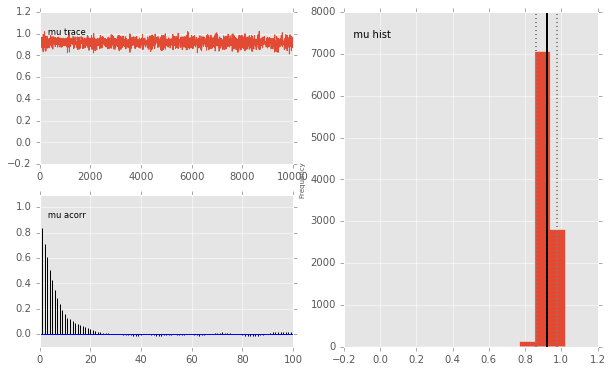

In [10]:
Matplot.plot(mu)